<a href="https://colab.research.google.com/github/samhoon000/Zara_Sales_Analysis/blob/main/Zara_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub
path = kagglehub.dataset_download("xontoloyo/data-penjualan-zara")

Using Colab cache for faster access to the 'data-penjualan-zara' dataset.


In [2]:
import os
print(os.listdir(path))

['zara.csv', '.nfs0000000073abcac900000286']


In [3]:
import pandas as pd

zara_df = pd.read_csv(f"{path}/zara.csv", sep=';')

In [4]:
zara_df.head()

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
0,185102,Aisle,No,Clothing,No,2823,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,2024-02-19T08:50:05.654618,jackets,MAN
1,188771,Aisle,No,Clothing,No,654,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,324052738-800-46,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,169.00,USD,2024-02-19T08:50:06.590930,jackets,MAN
2,180176,End-cap,Yes,Clothing,Yes,2220,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,335342680-800-44,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,129.00,USD,2024-02-19T08:50:07.301419,jackets,MAN
3,112917,Aisle,Yes,Clothing,Yes,1568,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,328303236-420-44,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,129.00,USD,2024-02-19T08:50:07.882922,jackets,MAN
4,192936,End-cap,No,Clothing,Yes,2942,Zara,https://www.zara.com/us/en/double-faced-jacket...,312368260-800-2,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,139.00,USD,2024-02-19T08:50:08.453847,jackets,MAN


In [5]:
zara_df['terms'].unique()

array(['jackets', 'shoes', 'sweaters', 'jeans', 't-shirts'], dtype=object)

In [6]:
zara_df=zara_df.drop(columns=['Product Category','brand','url','sku','description','scraped_at','terms'])

In [7]:
zara_df.head()

,Product ID,Product Position,Promotion,Seasonal,Sales Volume,name,price,currency,section
0,185102,Aisle,No,No,2823,BASIC PUFFER JACKET,19.99,USD,MAN
1,188771,Aisle,No,No,654,TUXEDO JACKET,169.00,USD,MAN
2,180176,End-cap,Yes,Yes,2220,SLIM FIT SUIT JACKET,129.00,USD,MAN
3,112917,Aisle,Yes,Yes,1568,STRETCH SUIT JACKET,129.00,USD,MAN
4,192936,End-cap,No,Yes,2942,DOUBLE FACED JACKET,139.00,USD,MAN


In [8]:
zara_df=zara_df.dropna()

In [9]:
zara_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 0 to 251
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product ID        251 non-null    int64  
 1   Product Position  251 non-null    object 
 2   Promotion         251 non-null    object 
 3   Seasonal          251 non-null    object 
 4   Sales Volume      251 non-null    int64  
 5   name              251 non-null    object 
 6   price             251 non-null    float64
 7   currency          251 non-null    object 
 8   section           251 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 19.6+ KB


In [10]:
zara_df.duplicated().sum()

np.int64(0)

In [11]:
zara_df['Revenue']=zara_df['price']*zara_df['Sales Volume']

In [12]:
zara_df.head()

,Product ID,Product Position,Promotion,Seasonal,Sales Volume,name,price,currency,section,Revenue
0,185102,Aisle,No,No,2823,BASIC PUFFER JACKET,19.99,USD,MAN,56431.77
1,188771,Aisle,No,No,654,TUXEDO JACKET,169.00,USD,MAN,110526.00
2,180176,End-cap,Yes,Yes,2220,SLIM FIT SUIT JACKET,129.00,USD,MAN,286380.00
3,112917,Aisle,Yes,Yes,1568,STRETCH SUIT JACKET,129.00,USD,MAN,202272.00
4,192936,End-cap,No,Yes,2942,DOUBLE FACED JACKET,139.00,USD,MAN,408938.00


# Which section makes the highest profit in Zara?

In [13]:
zara_df.groupby('section')['Revenue'].sum()

,Revenue
section,
MAN,35475561.03
WOMAN,3275813.45


## Based on the above observation MAN section revenue is ~983% higher than WOMAN section revenue

#

# Top 10 product that made the highest profit

In [14]:
zara_df.groupby('name')['Revenue'].sum().sort_values(ascending=False).head(10)

,Revenue
name,
CONTRASTING PATCHES BOMBER JACKET,889308.0
SUIT JACKET IN 100% LINEN,816675.0
FAUX LEATHER BOMBER JACKET,798852.6
PLAID OVERSHIRT,695369.0
RIB COLLAR JACKET,685883.0
SLIM FIT SUIT JACKET,675719.0
POCKET OVERSHIRT,666987.8
VINTAGE EFFECT LEATHER BOMBER JACKET,651521.0
SUEDE JACKET,649140.0


Text(0.5, 1.0, 'Price vs Units Sold')

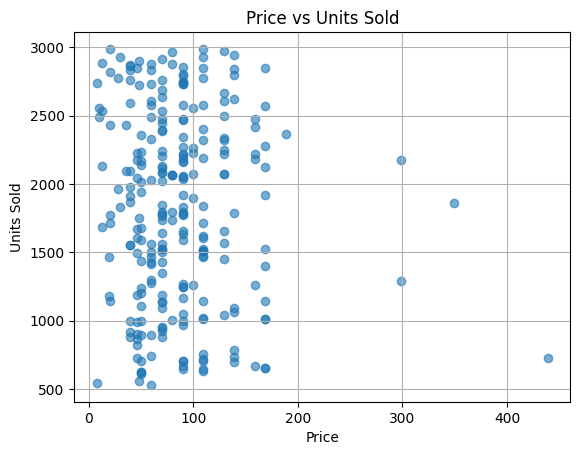

In [15]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(zara_df['price'],zara_df['Sales Volume'],alpha=0.6)
plt.xlabel("Price")
plt.ylabel("Units Sold")
plt.grid(True)
plt.title("Price vs Units Sold")

In [16]:
!git init

Reinitialized existing Git repository in /content/.git/


In [17]:
!git add .

In [18]:
!git commit -m "Initial data cleaning and exploratory analysis"

[master (root-commit) e95ad08] Initial data cleaning and exploratory analysis
 21 files changed, 51025 insertions(+)
 create mode 100644 .config/.last_opt_in_prompt.yaml
 create mode 100644 .config/.last_survey_prompt.yaml
 create mode 100644 .config/.last_update_check.json
 create mode 100644 .config/active_config
 create mode 100644 .config/config_sentinel
 create mode 100644 .config/configurations/config_default
 create mode 100644 .config/default_configs.db
 create mode 100644 .config/gce
 create mode 100644 .config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
 create mode 100644 .config/logs/2025.12.11/14.33.40.102128.log
 create mode 100644 .config/logs/2025.12.11/14.34.12.303029.log
 create mode 100644 .config/logs/2025.12.11/14.34.22.298248.log
 create mode 100644 .config/logs/2025.12.11/14.34.28.289959.log
 create mode 100644 .config/logs/2025.12.11/14.34.38.212031.log
 create mode 100644 .config/logs/2025.12.11/14.34.39.029902.log
 create mode 100755 sample_

In [19]:
!git config --global user.email "bdlsmhn@gmail.com"
!git config --global user.name "samhoon000"

In [20]:
!git rm -r --cached .config sample_data


rm '.config/.last_opt_in_prompt.yaml'
rm '.config/.last_survey_prompt.yaml'
rm '.config/.last_update_check.json'
rm '.config/active_config'
rm '.config/config_sentinel'
rm '.config/configurations/config_default'
rm '.config/default_configs.db'
rm '.config/gce'
rm '.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db'
rm '.config/logs/2025.12.11/14.33.40.102128.log'
rm '.config/logs/2025.12.11/14.34.12.303029.log'
rm '.config/logs/2025.12.11/14.34.22.298248.log'
rm '.config/logs/2025.12.11/14.34.28.289959.log'
rm '.config/logs/2025.12.11/14.34.38.212031.log'
rm '.config/logs/2025.12.11/14.34.39.029902.log'
rm 'sample_data/README.md'
rm 'sample_data/anscombe.json'
rm 'sample_data/california_housing_test.csv'
rm 'sample_data/california_housing_train.csv'
rm 'sample_data/mnist_test.csv'
rm 'sample_data/mnist_train_small.csv'


In [21]:
!git rm -r --cached .


fatal: pathspec '.' did not match any files


In [22]:
!git init

Reinitialized existing Git repository in /content/.git/


In [27]:
!pwd


/content


In [26]:
!find /content -name "*.ipynb"


/content/drive/MyDrive/Colab Notebooks/Untitled0.ipynb
/content/drive/MyDrive/Colab Notebooks/Country_TimeSeries_Animation.ipynb
/content/drive/MyDrive/Colab Notebooks/Sklearn.ipynb
/content/drive/MyDrive/Colab Notebooks/Untitled1.ipynb
/content/drive/MyDrive/Colab Notebooks/Untitled2.ipynb
/content/drive/MyDrive/Colab Notebooks/Untitled3.ipynb
/content/drive/MyDrive/Colab Notebooks/Sklearn2.ipynb
/content/drive/MyDrive/Colab Notebooks/Untitled4.ipynb
/content/drive/MyDrive/Colab Notebooks/Insurance_Price_Prediction_Project.ipynb
/content/drive/MyDrive/Colab Notebooks/Untitled5.ipynb
/content/drive/MyDrive/Colab Notebooks/Pandas_Tutorial.ipynb
/content/drive/MyDrive/Colab Notebooks/Untitled7.ipynb
/content/drive/MyDrive/Colab Notebooks/Untitled8.ipynb
/content/drive/MyDrive/Colab Notebooks/Untitled6.ipynb
/content/drive/MyDrive/Colab Notebooks/Spaceship_Titanic.ipynb
/content/drive/MyDrive/Colab Notebooks/Untitled9.ipynb
/content/drive/MyDrive/Colab Notebooks/Yolo_Setup.ipynb
/content/

In [29]:
!ls

 Branch-and-Bound.ipynb			    Untitled15.ipynb
 Christofides.ipynb			    Untitled16.ipynb
 Country_TimeSeries_Animation.ipynb	    Untitled17.ipynb
 Customer_Churn_Prediction.ipynb	    Untitled18.ipynb
 Digit_Classification.ipynb		    Untitled19.ipynb
 HealthCare.ipynb			    Untitled1.ipynb
 HeatWave_Alert.ipynb			   'Untitled (2)'
 Held-Karp.ipynb			    Untitled20.ipynb
 House_Price_Prediction.ipynb		    Untitled21.ipynb
 Insurance_Price_Prediction_Project.ipynb   Untitled22.ipynb
 magic					    Untitled23.ipynb
 ML-1.ipynb				    Untitled24.ipynb
 My_First_Yolo_Model.ipynb		    Untitled25.ipynb
 Nearest_Neighboripynb.ipynb		    Untitled26.ipynb
 Pandas_Tutorial.ipynb			    Untitled27.ipynb
 Road_Accident_Risk_Prediction.ipynb	    Untitled2.ipynb
 Sklearn2.ipynb				    Untitled3.ipynb
 Sklearn.ipynb				    Untitled4.ipynb
 Spaceship_Titanic.ipynb		    Untitled5.ipynb
 Untitled				    Untitled6.ipynb
 Untitled0.ipynb			    Untitled7.ipynb
'Untitled (1)'				    Untitled8.ipynb
 Untitled1

In [28]:
cd "/content/drive/MyDrive/Colab Notebooks"


/content/drive/MyDrive/Colab Notebooks


In [30]:
!git init


hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/drive/MyDrive/Colab Notebooks/.git/


In [31]:
!git add Zara_Sales_Analysis.ipynb

In [32]:
!git commit -m "Initial data cleaning and exploratory analysis"


[master (root-commit) ee0a17d] Initial data cleaning and exploratory analysis
 1 file changed, 1 insertion(+)
 create mode 100644 Zara_Sales_Analysis.ipynb


In [33]:
!git remote add origin https://github.com/samhoon000/Zara_Sales_Analysis.git


In [34]:
!git branch -M main
!git push -u origin main


fatal: could not read Username for 'https://github.com': No such device or address
